100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


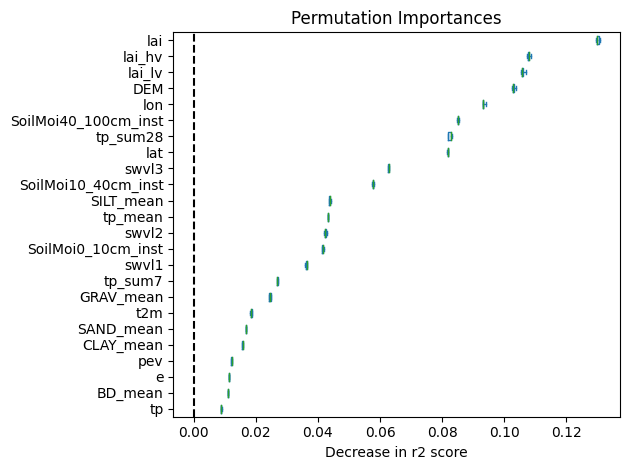

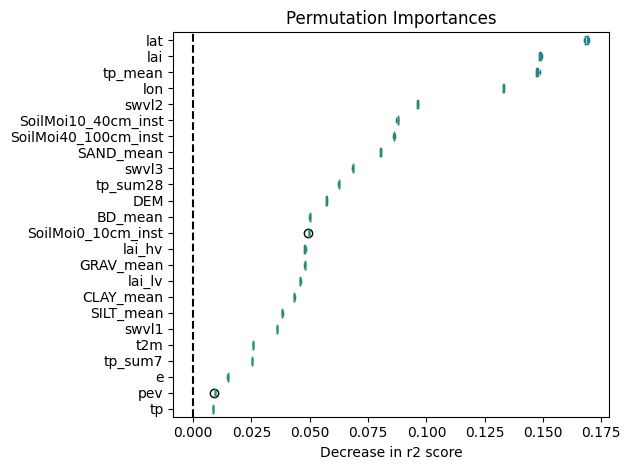

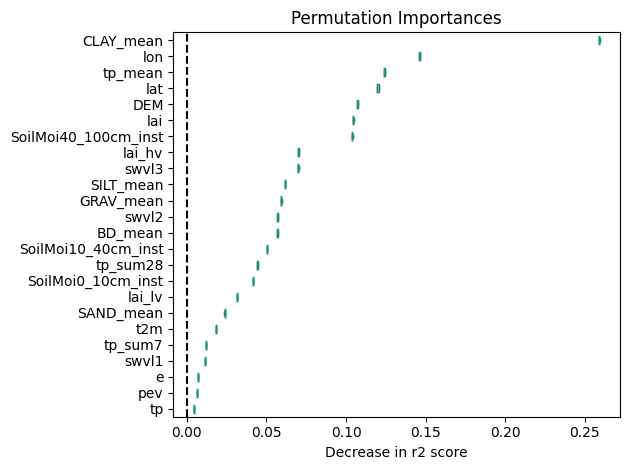

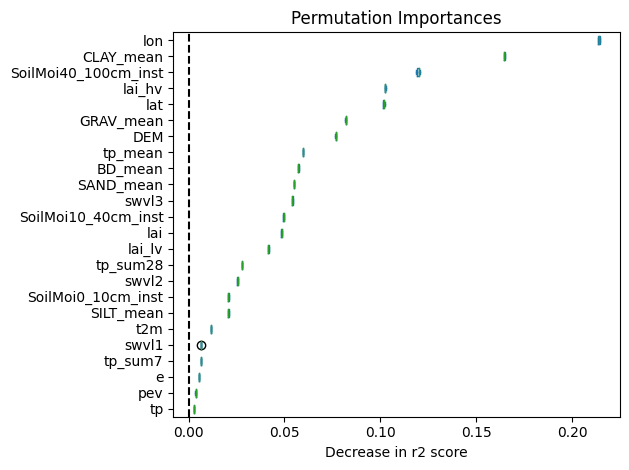

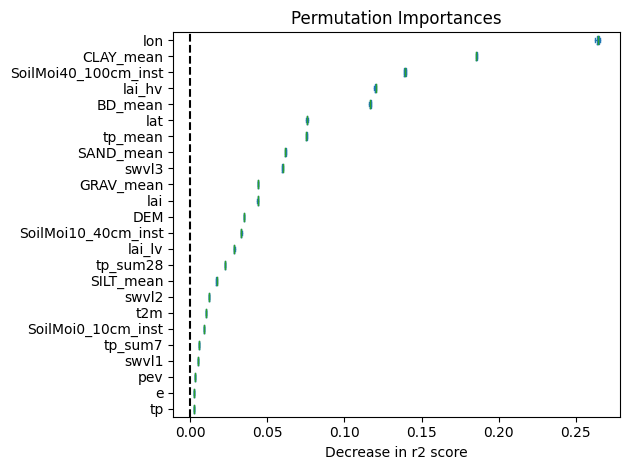

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import os

save_root = "../../data/plot/permutation_importance"

for l in tqdm(range(1, 6)):
    data = np.load(f"../../data/plot/permutation_importance/layer{l}.npz")
    importances_mean = data["importances_mean"]
    sorted_importances_idx = importances_mean.argsort()

    importances = data["importances"]
    feature_names = data["feature_names"]

    df_importances = pd.DataFrame(
        importances[sorted_importances_idx].T, 
        columns=feature_names[sorted_importances_idx]
    )

    sel_features = [x for x in df_importances.columns if not x.startswith("month")]
    df_importances = df_importances[sel_features]

    ax = df_importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances")
    ax.set_xlabel("Decrease in r2 score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

    plt.savefig(os.path.join(save_root, f"layer{l}.pdf"))
